In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Model of ML
from sklearn.svm import SVC

#Metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data= pd.read_csv('corona.csv')
data

C:\Users\D\AppData\Local\Temp\ipykernel_34716\2366089364.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('corona.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [4]:
data= data.dropna()

In [5]:
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,False,False,False,False,negative,No,male,Abroad
13728,13729,22-03-2020,True,False,False,False,False,negative,No,female,Abroad
13730,13731,22-03-2020,True,True,False,False,False,positive,Yes,female,Other
13731,13732,22-03-2020,False,False,False,False,False,other,No,female,Other
13732,13733,22-03-2020,False,False,False,False,False,other,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,14-04-2020,True,False,True,False,False,negative,Yes,male,Abroad
156036,156037,14-04-2020,True,False,True,True,False,negative,No,male,Abroad
156037,156038,14-04-2020,True,True,False,False,False,negative,No,female,Abroad
156038,156039,14-04-2020,False,False,False,False,False,negative,No,male,Other


In [6]:
print(len(data[data['Corona']=='other']))
print(len(data[data['Corona']=='positive']))
print(len(data[data['Corona']=='negative']))

1878
10626
125668


In [7]:
data= data[data['Corona']!= 'other']
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,False,False,False,False,negative,No,male,Abroad
13728,13729,22-03-2020,True,False,False,False,False,negative,No,female,Abroad
13730,13731,22-03-2020,True,True,False,False,False,positive,Yes,female,Other
13734,13735,22-03-2020,False,False,False,False,False,negative,No,male,Other
13735,13736,22-03-2020,False,False,False,False,False,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,14-04-2020,True,False,True,False,False,negative,Yes,male,Abroad
156036,156037,14-04-2020,True,False,True,True,False,negative,No,male,Abroad
156037,156038,14-04-2020,True,True,False,False,False,negative,No,female,Abroad
156038,156039,14-04-2020,False,False,False,False,False,negative,No,male,Other


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136294 entries, 13727 to 156039
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               136294 non-null  int64 
 1   Test_date            136294 non-null  object
 2   Cough_symptoms       136294 non-null  object
 3   Fever                136294 non-null  object
 4   Sore_throat          136294 non-null  object
 5   Shortness_of_breath  136294 non-null  object
 6   Headache             136294 non-null  object
 7   Corona               136294 non-null  object
 8   Age_60_above         136294 non-null  object
 9   Sex                  136294 non-null  object
 10  Known_contact        136294 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [9]:
data=data.iloc[:,2:]
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,True,False,False,False,False,negative,No,male,Abroad
13728,True,False,False,False,False,negative,No,female,Abroad
13730,True,True,False,False,False,positive,Yes,female,Other
13734,False,False,False,False,False,negative,No,male,Other
13735,False,False,False,False,False,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...
156035,True,False,True,False,False,negative,Yes,male,Abroad
156036,True,False,True,True,False,negative,No,male,Abroad
156037,True,True,False,False,False,negative,No,female,Abroad
156038,False,False,False,False,False,negative,No,male,Other


In [10]:
data['Known_contact'].value_counts()

Known_contact
Other                     114358
Abroad                     14534
Contact with confirmed      7402
Name: count, dtype: int64

In [11]:
data.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype='object')

In [12]:
#COnverting the columns in integer using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()
data['Cough_symptoms']=encoder.fit_transform(data[['Cough_symptoms']]).astype('int')
data['Fever']=encoder.fit_transform(data[['Fever']]).astype('int')
data['Sore_throat']=encoder.fit_transform(data[['Sore_throat']]).astype('int')
data['Shortness_of_breath']=encoder.fit_transform(data[['Shortness_of_breath']]).astype('int')
data['Headache']=encoder.fit_transform(data[['Headache']]).astype('int')
data['Corona']=encoder.fit_transform(data[['Corona']]).astype('int')
data['Age_60_above']=encoder.fit_transform(data[['Age_60_above']]).astype('int')
data['Sex']=encoder.fit_transform(data[['Sex']]).astype('int')
data['Known_contact']=encoder.fit_transform(data[['Known_contact']]).astype('int')


In [13]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1,0,0,0,0,0,0,1,0
13728,1,0,0,0,0,0,0,0,0
13730,1,1,0,0,0,1,1,0,2
13734,0,0,0,0,0,0,0,1,2
13735,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
156035,1,0,1,0,0,0,1,1,0
156036,1,0,1,1,0,0,0,1,0
156037,1,1,0,0,0,0,0,0,0
156038,0,0,0,0,0,0,0,1,2


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136294 entries, 13727 to 156039
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Cough_symptoms       136294 non-null  int64
 1   Fever                136294 non-null  int64
 2   Sore_throat          136294 non-null  int64
 3   Shortness_of_breath  136294 non-null  int64
 4   Headache             136294 non-null  int64
 5   Corona               136294 non-null  int64
 6   Age_60_above         136294 non-null  int64
 7   Sex                  136294 non-null  int64
 8   Known_contact        136294 non-null  int64
dtypes: int64(9)
memory usage: 10.4 MB


In [15]:
df1 = data[data['Corona'] == 1]
df2 = data[data['Corona'] == 0].iloc[0:10626]
print(len(df1))
data = pd.concat([df1,df2])
print(len(df2))

10626
10626


In [16]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13730,1,1,0,0,0,1,1,0,2
13748,1,1,0,0,0,1,1,1,0
13752,1,1,0,0,0,1,1,1,1
13765,1,1,0,0,0,1,0,1,1
13768,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
25815,0,0,0,0,0,0,0,1,2
25816,0,0,0,0,0,0,0,1,2
25817,0,0,0,0,0,0,0,1,2
25818,0,0,0,0,0,0,0,0,2


In [17]:
#Shuffling the data
data= data.sample(frac=1)
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
20644,0,0,0,0,0,0,0,1,2
20570,0,0,0,0,0,0,0,1,2
81037,0,1,0,0,0,1,0,0,1
47007,0,0,0,0,1,1,0,1,1
21894,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
25260,0,0,1,0,1,1,0,1,0
88533,1,0,0,0,0,1,0,1,2
14347,0,0,0,0,0,0,0,0,2
92550,0,1,0,1,0,1,0,1,2


In [18]:
data['Known_contact'].value_counts()

Known_contact
2    13082
1     5226
0     2944
Name: count, dtype: int64

In [19]:
data.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Cough_symptoms,1.000000,0.400116,0.172939,0.167572,0.183600,0.302354,-0.004941,0.042728,-0.400468
Fever,0.400116,1.000000,0.152964,0.170466,0.233707,0.389041,0.067895,0.090105,-0.211166
Sore_throat,0.172939,0.152964,1.000000,0.156534,0.292422,0.256021,-0.028166,-0.025874,-0.083448
Shortness_of_breath,0.167572,0.170466,0.156534,1.000000,0.172170,0.213043,0.037000,0.007237,-0.062398
Headache,0.183600,0.233707,0.292422,0.172170,1.000000,0.318287,-0.040057,-0.005286,-0.103813
Corona,0.302354,0.389041,0.256021,0.213043,0.318287,1.000000,0.060173,0.096052,-0.299333
Age_60_above,-0.004941,0.067895,-0.028166,0.037000,-0.040057,0.060173,1.000000,0.000672,0.042194
Sex,0.042728,0.090105,-0.025874,0.007237,-0.005286,0.096052,0.000672,1.000000,-0.004837
Known_contact,-0.400468,-0.211166,-0.083448,-0.062398,-0.103813,-0.299333,0.042194,-0.004837,1.000000


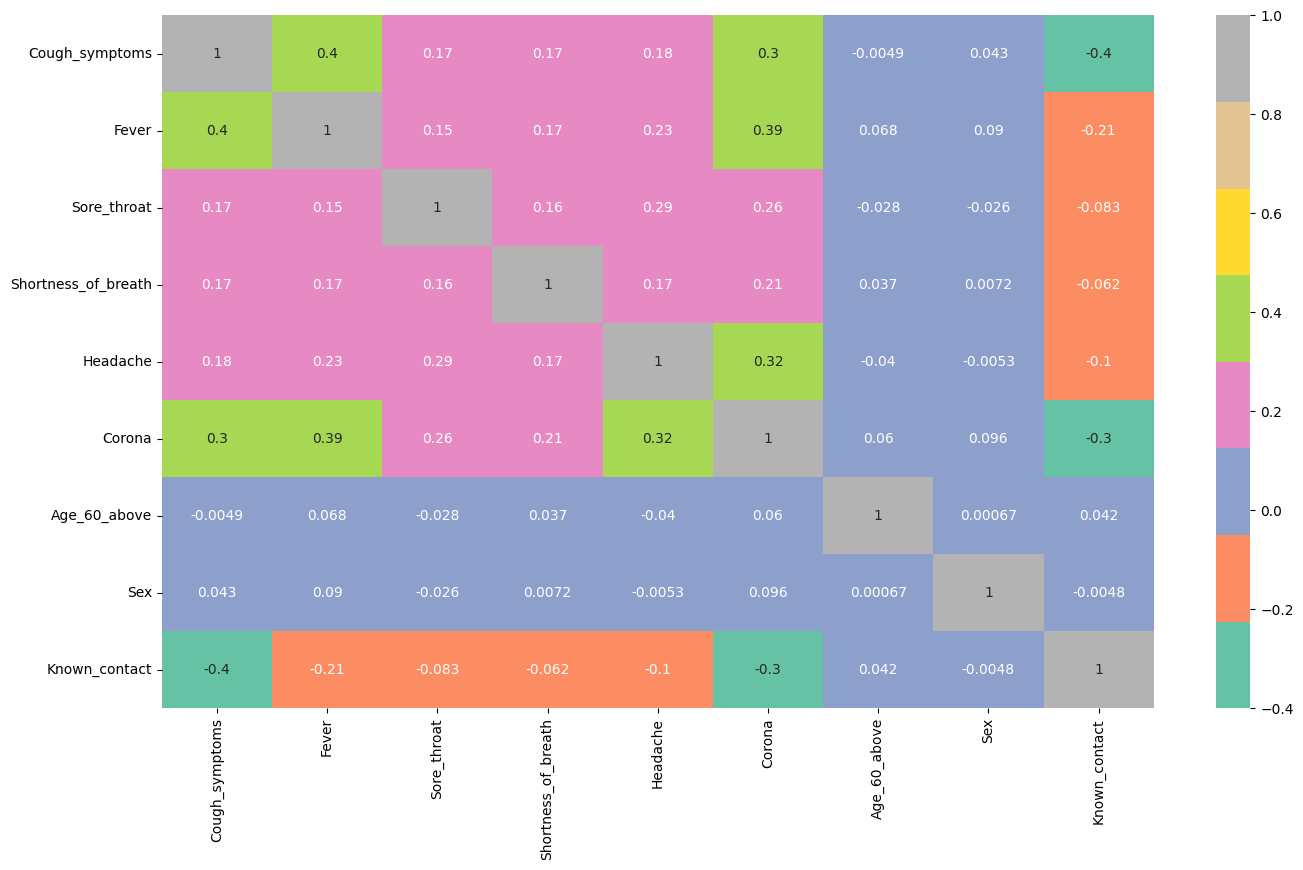

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, cmap= 'Set2')
plt.show()

In [21]:
data.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype='object')

In [22]:
#training and normalization of the data
x=data[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']]
y=data['Corona']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.15,random_state=1)

In [23]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)

SVC()

In [24]:
x_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
94371,1,1,0,0,1,0,1,1
16011,1,1,0,0,1,1,1,2
37805,0,0,0,0,0,0,1,2
15490,0,0,0,0,0,0,0,2
14728,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...
40271,1,1,1,1,1,0,0,1
121312,0,1,0,0,0,0,1,1
24731,0,0,0,0,0,0,1,2
25482,0,0,0,0,0,0,0,2


In [25]:
y_pred=svc.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [26]:
#Accuracy testing

svc_accuracy= round(accuracy_score(y_test,y_pred),4)*100
svc_accuracy

86.76

In [27]:
#To dump model
import pickle as pk
filename= 'covid.pickle'
pk.dump(svc, open(filename,'wb'))

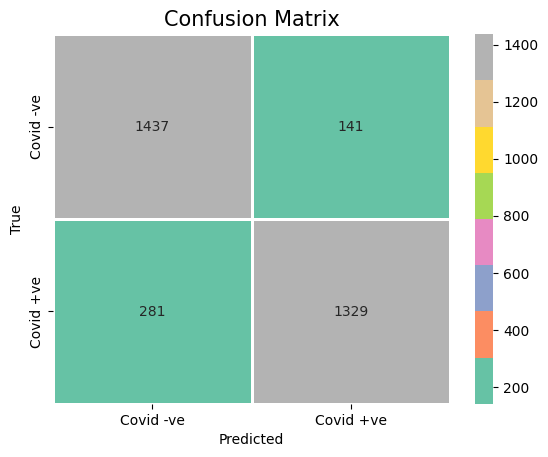

In [28]:
cm=confusion_matrix(y_test,y_pred)
class_label = ["Covid -ve", "Covid +ve"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(y_test)
print(classification_report(ytest,svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1578
           1       0.90      0.83      0.86      1610

    accuracy                           0.87      3188
   macro avg       0.87      0.87      0.87      3188
weighted avg       0.87      0.87      0.87      3188

